In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn import preprocessing

In [23]:
data=pd.read_csv(r"Book.csv")
print(data.columns)

Index(['Year', 'Years', 'Unit Consumption in MU',
       '% increase w.r.t. the previous year', 'Peak Demand in MW',
       '% inrease the prevoius year'],
      dtype='object')


In [24]:
data = data.rename(columns={"Unit Consumption in MU": "UnitConInMU",
                   "% increase w.r.t. the previous year": "PerIncWRTTPY",
                   "Peak Demand in MW": "PDinMW","% inrease the prevoius year":"PIncITPreYr"})
print(data.columns)

Index(['Year', 'Years', 'UnitConInMU', 'PerIncWRTTPY', 'PDinMW',
       'PIncITPreYr'],
      dtype='object')


In [25]:
features=data["Year"].values.reshape(-1,1)

In [39]:
max_f = max(features)
min_f = min(features)
print(max_f)
print(min_f)

[2019]
[2002]


In [40]:
norm_features = preprocessing.minmax_scale(features)
print(norm_features)
label=data["UnitConInMU"]

[[0.        ]
 [0.05882353]
 [0.11764706]
 [0.17647059]
 [0.23529412]
 [0.29411765]
 [0.35294118]
 [0.41176471]
 [0.47058824]
 [0.52941176]
 [0.58823529]
 [0.64705882]
 [0.70588235]
 [0.76470588]
 [0.82352941]
 [0.88235294]
 [0.94117647]
 [1.        ]]


In [42]:
max_l = max(label)
min_l = min(label)
print(max_l)
print(min_l)

34700.115
19666.64


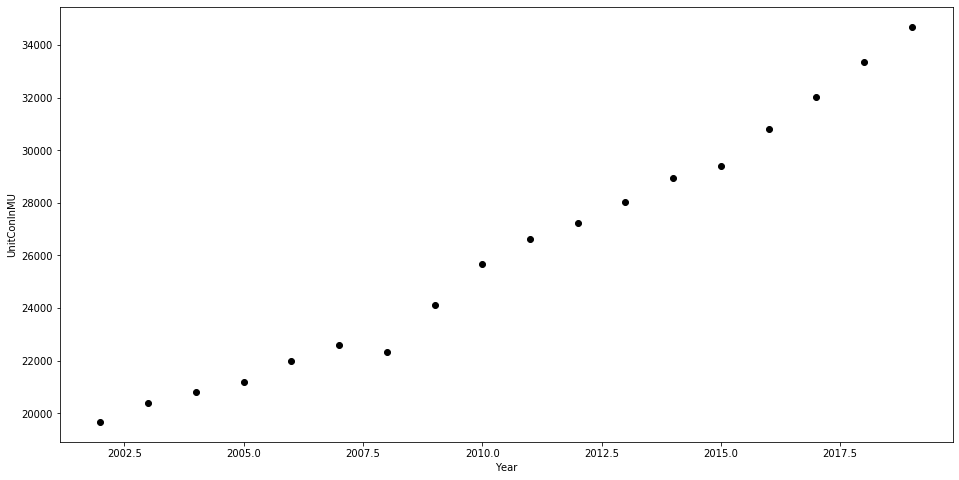

In [29]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['Year'],
    data['UnitConInMU'],
    c='black'
)
plt.ylabel("UnitConInMU")
plt.xlabel("Year")
plt.show()

In [44]:
norm_label = preprocessing.minmax_scale(label)
print(norm_label)


[0.         0.0477827  0.07607296 0.10096049 0.15370172 0.19385092
 0.17603475 0.29651621 0.3991944  0.46235817 0.50342486 0.55629899
 0.61842934 0.6485011  0.73996638 0.82099794 0.91156502 1.        ]


In [31]:
x_train, x_test,y_train,y_test=train_test_split(norm_features,norm_label,test_size=0.075,random_state=3)
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

2020
[34520.53236724]
2021
[35407.87182586]
2022
[36295.21128448]
2023
[37182.5507431]
2024
[38069.89020172]
2025
[38957.22966034]


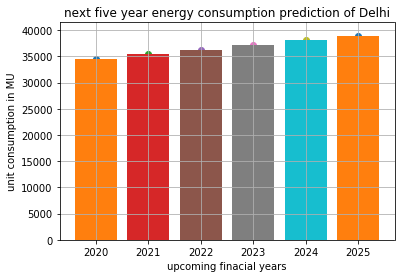

In [45]:
years=[2020,2021,2022,2023,2024,2025]
for i in years:
    x=i
    print(x)
    scaled_x = float((x - min_f) / (max_f - min_f))
    pvalue=model.predict([[scaled_x]])
    
    new_p = pvalue*(max_l-min_l) + min_l
    y=new_p
    print(new_p)
    
    
    plt.scatter(x,y);
    plt.bar(x,new_p);
    plt.ylabel('unit consumption in MU');
    plt.xlabel('upcoming finacial years');
    plt.grid(True);
    plt.title('next five year energy consumption prediction of Delhi');

In [46]:
y_pred=model.predict(x_test)

df=pd.DataFrame({'Actual_Energy':y_test, 'Predcited_predicted':y_pred})
print("Compared Values::\n",df)
accuracy=model.score(x_test,y_test)

Compared Values::
    Actual_Energy  Predcited_predicted
0       0.556299             0.574885
1       0.076073             0.043667


[0.57488479 0.04366662]


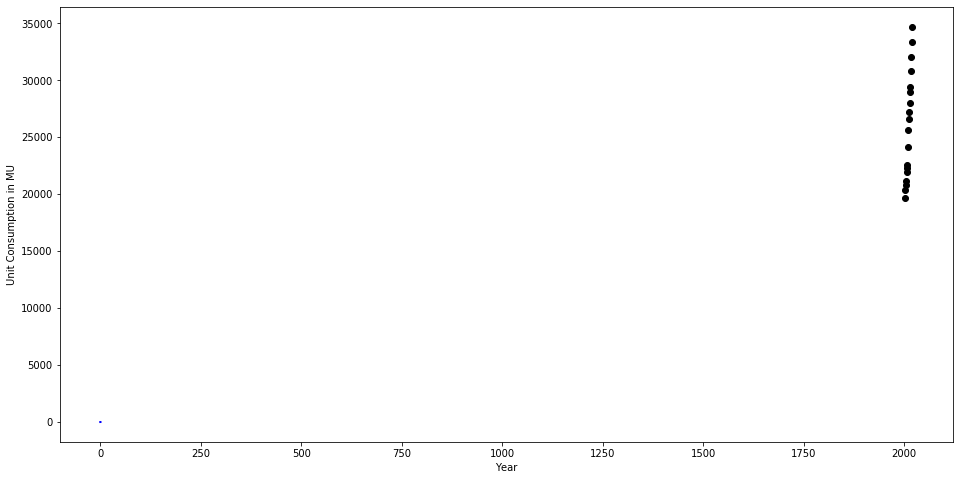

In [30]:
y_pred1=model.predict(x_test)
y_pred2 = np.asarray(y_pred1)
print(y_pred2)

plt.figure(figsize=(16, 8))
plt.scatter(
    data['Year'],
    data['Unit Consumption in MU'],
    c='black'
)

plt.plot(
    y_test,
    y_pred2,
    c='blue',
    linewidth=2
)
plt.ylabel("Unit Consumption in MU")
plt.xlabel("Year")
plt.show()


Acccuracy of the model:: 98.78967908950257
Mean Absolute Error: 0.025496072185115272
Mean Squared Error: 0.0006978015610769306
Root Mean Squared Error: 0.026415933848284272


(0, 100)

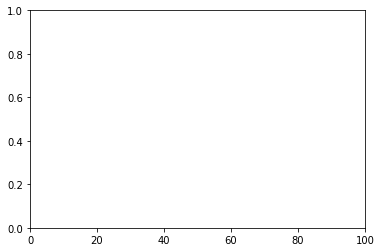

In [31]:
print("Acccuracy of the model::",(accuracy*100))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
plt.show();
plt.xlim(0, 100)